In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("F:/global superstore dataset.csv")

In [5]:
data.head()

,Sales,Profit,Region,Product Category,Date
0,1878.96,896.32,South America,Furniture,2024-02-14 13:29:23.430266
1,4754.06,572.19,Oceania,Technology,2023-08-25 13:29:23.430266
2,3662.65,119.06,Asia,Technology,2020-12-08 13:29:23.430266
3,2997.31,1127.59,Africa,Appliances,2024-07-28 13:29:23.430266
4,788.53,869.46,North America,Office Supplies,2022-11-01 13:29:23.430266


In [7]:
data.tail()

,Sales,Profit,Region,Product Category,Date
500,4020.32,-377.84,South America,Clothing,2022-07-17 13:29:23.430266
501,1205.41,574.21,Europe,Office Supplies,2021-08-11 13:29:23.430266
502,4316.89,418.27,South America,Furniture,2021-11-29 13:29:23.430266
503,2618.44,835.12,Europe,Furniture,2020-09-14 13:29:23.430266
504,1845.24,212.19,North America,Furniture,2023-12-08 13:29:23.430266


In [9]:
data.shape

(505, 5)

In [11]:
data.dtypes

Sales               float64
Profit              float64
Region               object
Product Category     object
Date                 object
dtype: object

In [13]:
data.isnull().sum()

Sales               6
Profit              5
Region              4
Product Category    4
Date                4
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             499 non-null    float64
 1   Profit            500 non-null    float64
 2   Region            501 non-null    object 
 3   Product Category  501 non-null    object 
 4   Date              501 non-null    object 
dtypes: float64(2), object(3)
memory usage: 19.9+ KB


In [17]:
data['Sales'] = data['Sales'].fillna(data['Sales'].mean())

In [21]:
data['Profit'] = data['Profit'].fillna(data['Profit'].mean())

In [25]:
data['Region'] = data['Region'].fillna(data['Region'].mode())

In [27]:
data['Product Category'] = data['Product Category'].fillna(data['Product Category'].mode())

In [31]:
data['Date'] = data['Date'].fillna(data['Date'].mode())

In [33]:
data.drop_duplicates()

,Sales,Profit,Region,Product Category,Date
0,1878.96,896.32,South America,Furniture,2024-02-14 13:29:23.430266
1,4754.06,572.19,Oceania,Technology,2023-08-25 13:29:23.430266
2,3662.65,119.06,Asia,Technology,2020-12-08 13:29:23.430266
3,2997.31,1127.59,Africa,Appliances,2024-07-28 13:29:23.430266
4,788.53,869.46,North America,Office Supplies,2022-11-01 13:29:23.430266
...,...,...,...,...,...
495,1773.23,-316.84,Oceania,Furniture,2021-07-20 13:29:23.430266
496,2922.44,1334.63,Europe,Technology,2024-02-27 13:29:23.430266
497,397.90,-226.36,Asia,Furniture,2023-10-28 13:29:23.430266
498,4872.23,1400.47,Oceania,Technology,2022-11-21 13:29:23.430266


In [35]:
data.shape

(505, 5)

In [39]:
for col in ['Sales', 'Profit']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

In [45]:
print("Mean:\n", data[['Sales', 'Profit']].mean())
print("\nMedian:\n", data[['Sales', 'Profit']].median())
print("\nStandard Deviation:\n", data[['Sales', 'Profit']].std())
print("\nVariance:\n", data[['Sales', 'Profit']].var())

Mean:
 Sales     2506.632064
Profit     463.697200
dtype: float64

Median:
 Sales     2561.6
Profit     452.1
dtype: float64

Standard Deviation:
 Sales     1473.572383
Profit     568.578845
dtype: float64

Variance:
 Sales     2.171416e+06
Profit    3.232819e+05
dtype: float64


In [57]:
# Correlation matrix
correlation_matrix = data[['Sales', 'Profit']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
            Sales    Profit
Sales   1.000000  0.009474
Profit  0.009474  1.000000


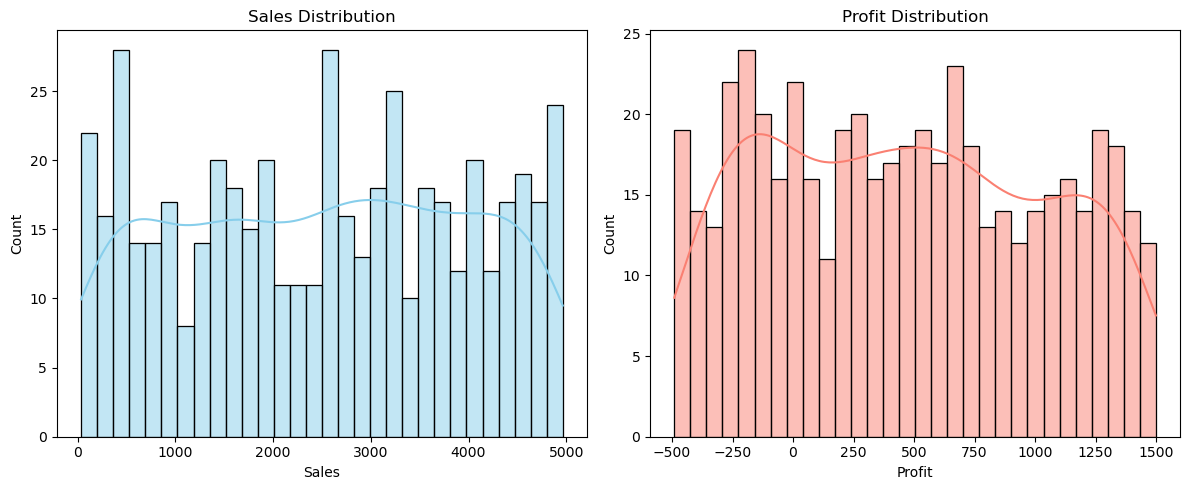

In [67]:
# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Sales'], kde=True, bins=30, color='skyblue')
plt.title('Sales Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Profit'], kde=True, bins=30, color='salmon')
plt.title('Profit Distribution')
plt.tight_layout()
plt.show()

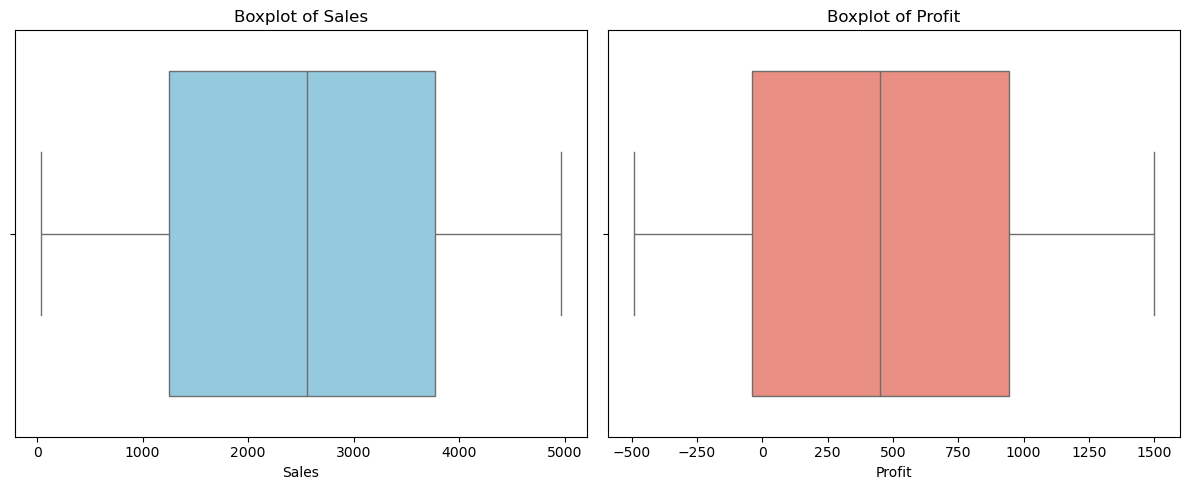

In [69]:
# Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Sales'], color='skyblue')
plt.title('Boxplot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Profit'], color='salmon')
plt.title('Boxplot of Profit')
plt.tight_layout()
plt.show()

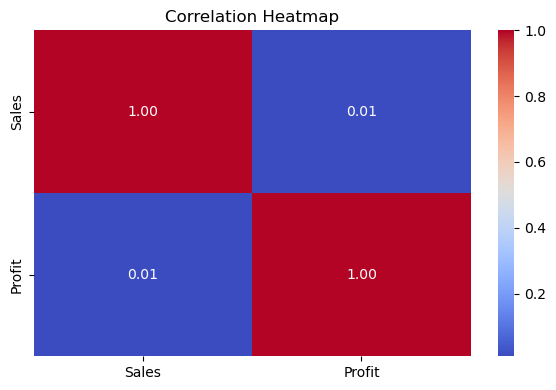

In [71]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()